In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import calendar
from datetime import datetime
import os
pd.options.display.float_format = "{:.2f}".format
#from tqdm import tqdm

In [65]:
def group_by_fare(x):
    if x >= 2 and x < 50:
        return '2-50'
    elif x < 100:
        return '51-100'
    elif x < 200:
        return '101-200'
    else:
        return '>200'

In [3]:
train = pd.read_csv(r'D:\PycharmProjects\TaxiPrediction\train.csv',nrows = 1000000,parse_dates=['pickup_datetime'])

In [4]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.50,2009-06-15 17:26:21+00:00,-73.84,40.72,-73.84,40.71,1
1,2010-01-05 16:52:16.0000002,16.90,2010-01-05 16:52:16+00:00,-74.02,40.71,-73.98,40.78,1
2,2011-08-18 00:35:00.00000049,5.70,2011-08-18 00:35:00+00:00,-73.98,40.76,-73.99,40.75,2
3,2012-04-21 04:30:42.0000001,7.70,2012-04-21 04:30:42+00:00,-73.99,40.73,-73.99,40.76,1
4,2010-03-09 07:51:00.000000135,5.30,2010-03-09 07:51:00+00:00,-73.97,40.77,-73.96,40.78,1


__Features__
* pickup_datetime - timestamp value indicating when the taxi ride started.
* pickup_longitude - float for longitude coordinate of where the taxi ride started.
* pickup_latitude - float for latitude coordinate of where the taxi ride started.
* dropoff_longitude - float for longitude coordinate of where the taxi ride ended.
* dropoff_latitude - float for latitude coordinate of where the taxi ride ended.
* passenger_count - integer indicating the number of passengers in the taxi ride.

__Target__
* fare_amount - float dollar amount of the cost of the taxi ride. This value is only in the training set; this is what you are predicting in the test set and it is required in your submission CSV.

__I will analyse only 1kk sample of data (Size of whole data is 55kk)__

In [5]:
train.shape

(1000000, 8)

In [6]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.00,1000000.00,1000000.00,999990.00,999990.00,1000000.00
mean,11.35,-72.53,39.93,-72.53,39.92,1.68
std,9.82,12.06,7.63,11.32,8.20,1.32
min,-44.90,-3377.68,-3116.29,-3383.30,-3114.34,0.00
25%,6.00,-73.99,40.73,-73.99,40.73,1.00
50%,8.50,-73.98,40.75,-73.98,40.75,1.00
75%,12.50,-73.97,40.77,-73.96,40.77,2.00
max,500.00,2522.27,2621.63,45.58,1651.55,208.00


__Let's look on description of out 1kk sample__
* We can see that mean fare amount is: __11.35__
* Minimal fare amount is: __-44.90__ - so it's negative fare amount is impossible. We should drop outliers
* Maximum Fare amount is: __500__ 
* Standard deviation is:  __9.82__
* Min number of passangers in taxi raid: __0__ - > we need to check it
* Average number of passangers in taxi raid: __1.68__ 

In [8]:
train.isnull().sum().to_frame().T

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,0,0,0,0,10,10,0


In [15]:
train['passenger_count'].value_counts()

1      691292
2      148098
5       70593
3       43762
4       21427
6       21195
0        3555
208         1
Name: passenger_count, dtype: int64

In [59]:
train = train[(train['fare_amount']>=2) & (train['passenger_count']<208)]
train = train.dropna()

In [66]:
train['fare_group'] = train['fare_amount'].apply(lambda x: group_by_fare(x))

In [60]:
train.shape

(999912, 8)

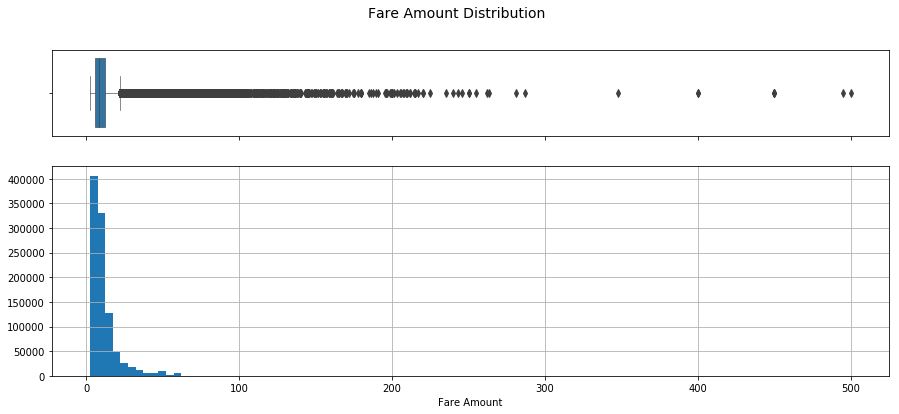

In [84]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(15,6),gridspec_kw={"height_ratios": (.35, .85)})
c1 = sns.boxplot(train['fare_amount'], ax=ax_box,linewidth=0.6)
c2 = train['fare_amount'].hist(bins=100,ax=ax_hist);
c1.set_xlabel('');
c2.set_xlabel('Fare Amount');
plt.suptitle('Fare Amount Distribution',fontsize=14);

In [ ]:
sns